Reading First image :  1.jpeg


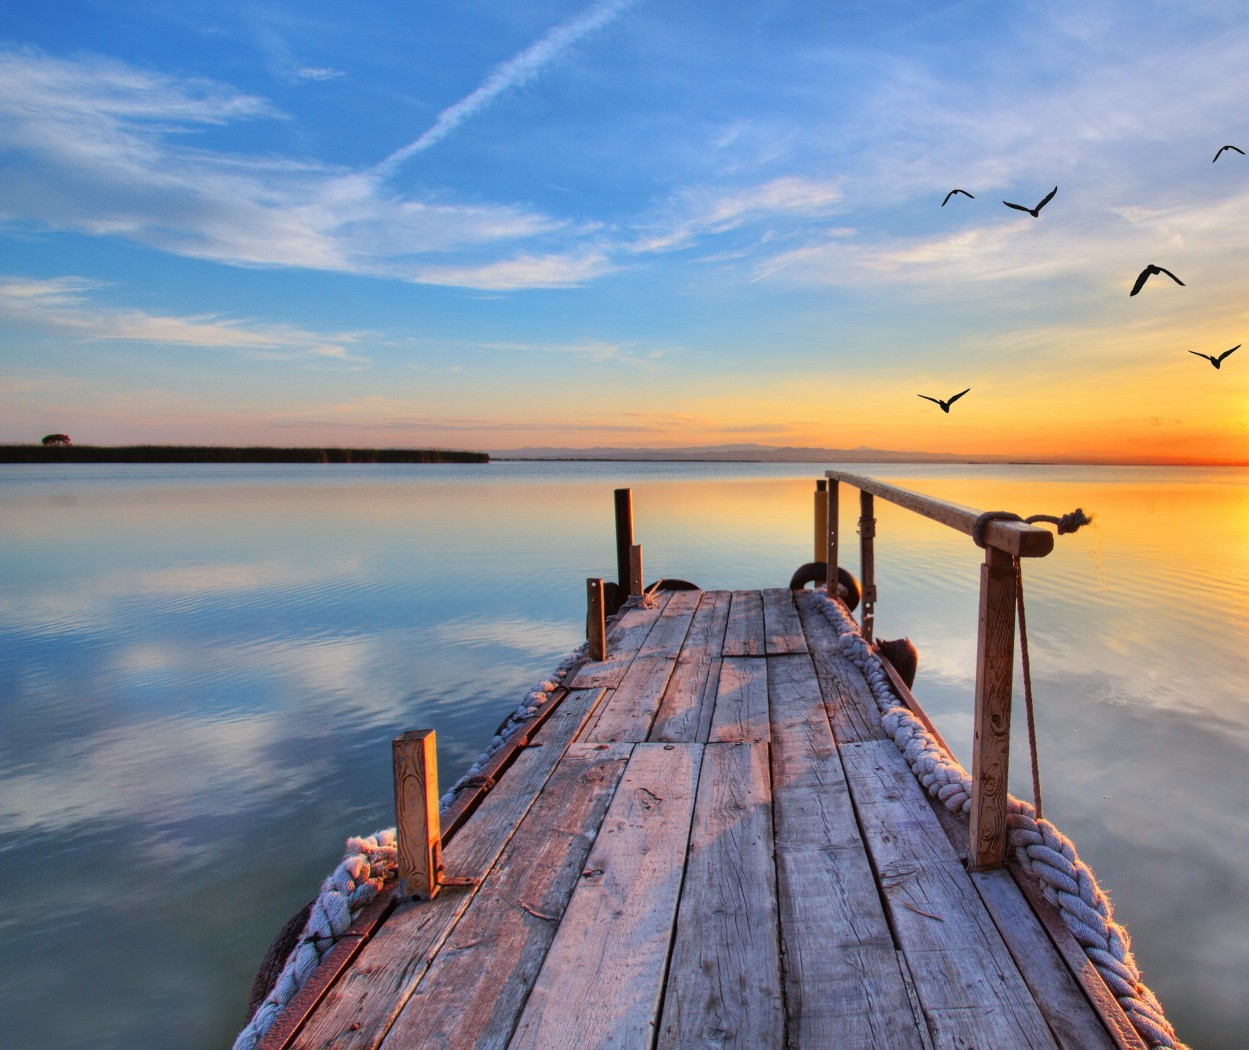

Reading Second Image :  2.jpeg
Aligning images ...
Saving Image with Keypoints
[[ 62 183 114 ... 111 222 243]
 [ 10 157  50 ...  12 189 223]
 [146 128 226 ... 136 241 138]
 ...
 [233 181 188 ... 100 218 242]
 [ 27 155 255 ... 134  37 249]
 [159  57  59 ...  38 167 243]] [[140  16  51 ...  46  53 247]
 [162 184 144 ...   8 149 142]
 [  2  12   2 ...  11  48 136]
 ...
 [ 34  58 115 ... 138  71 237]
 [ 43  79 194 ... 220 120 141]
 [ 35 135 106 ... 204 120 221]]
Saving Image with matches
Saving aligned image


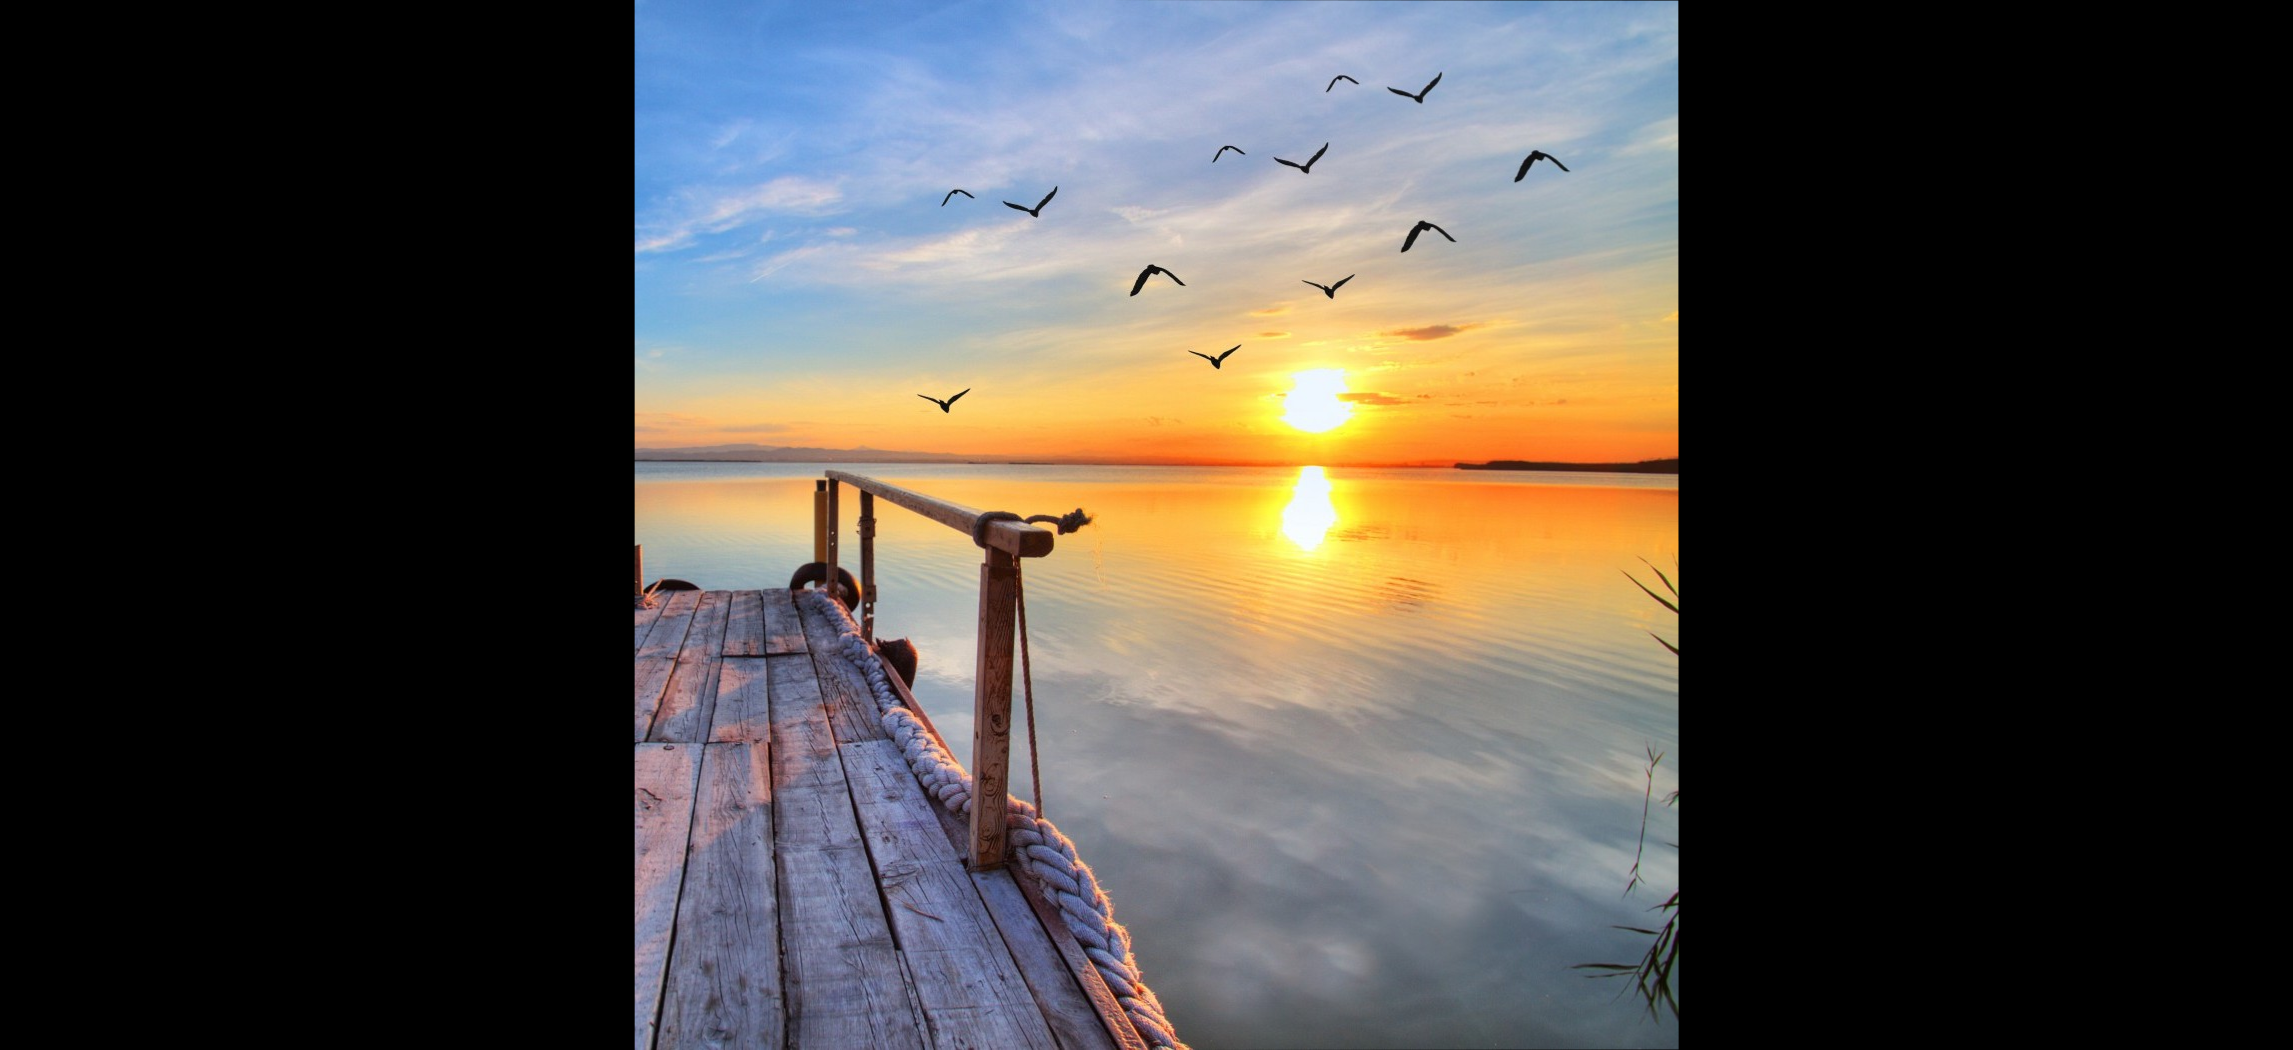

Saving stitched image


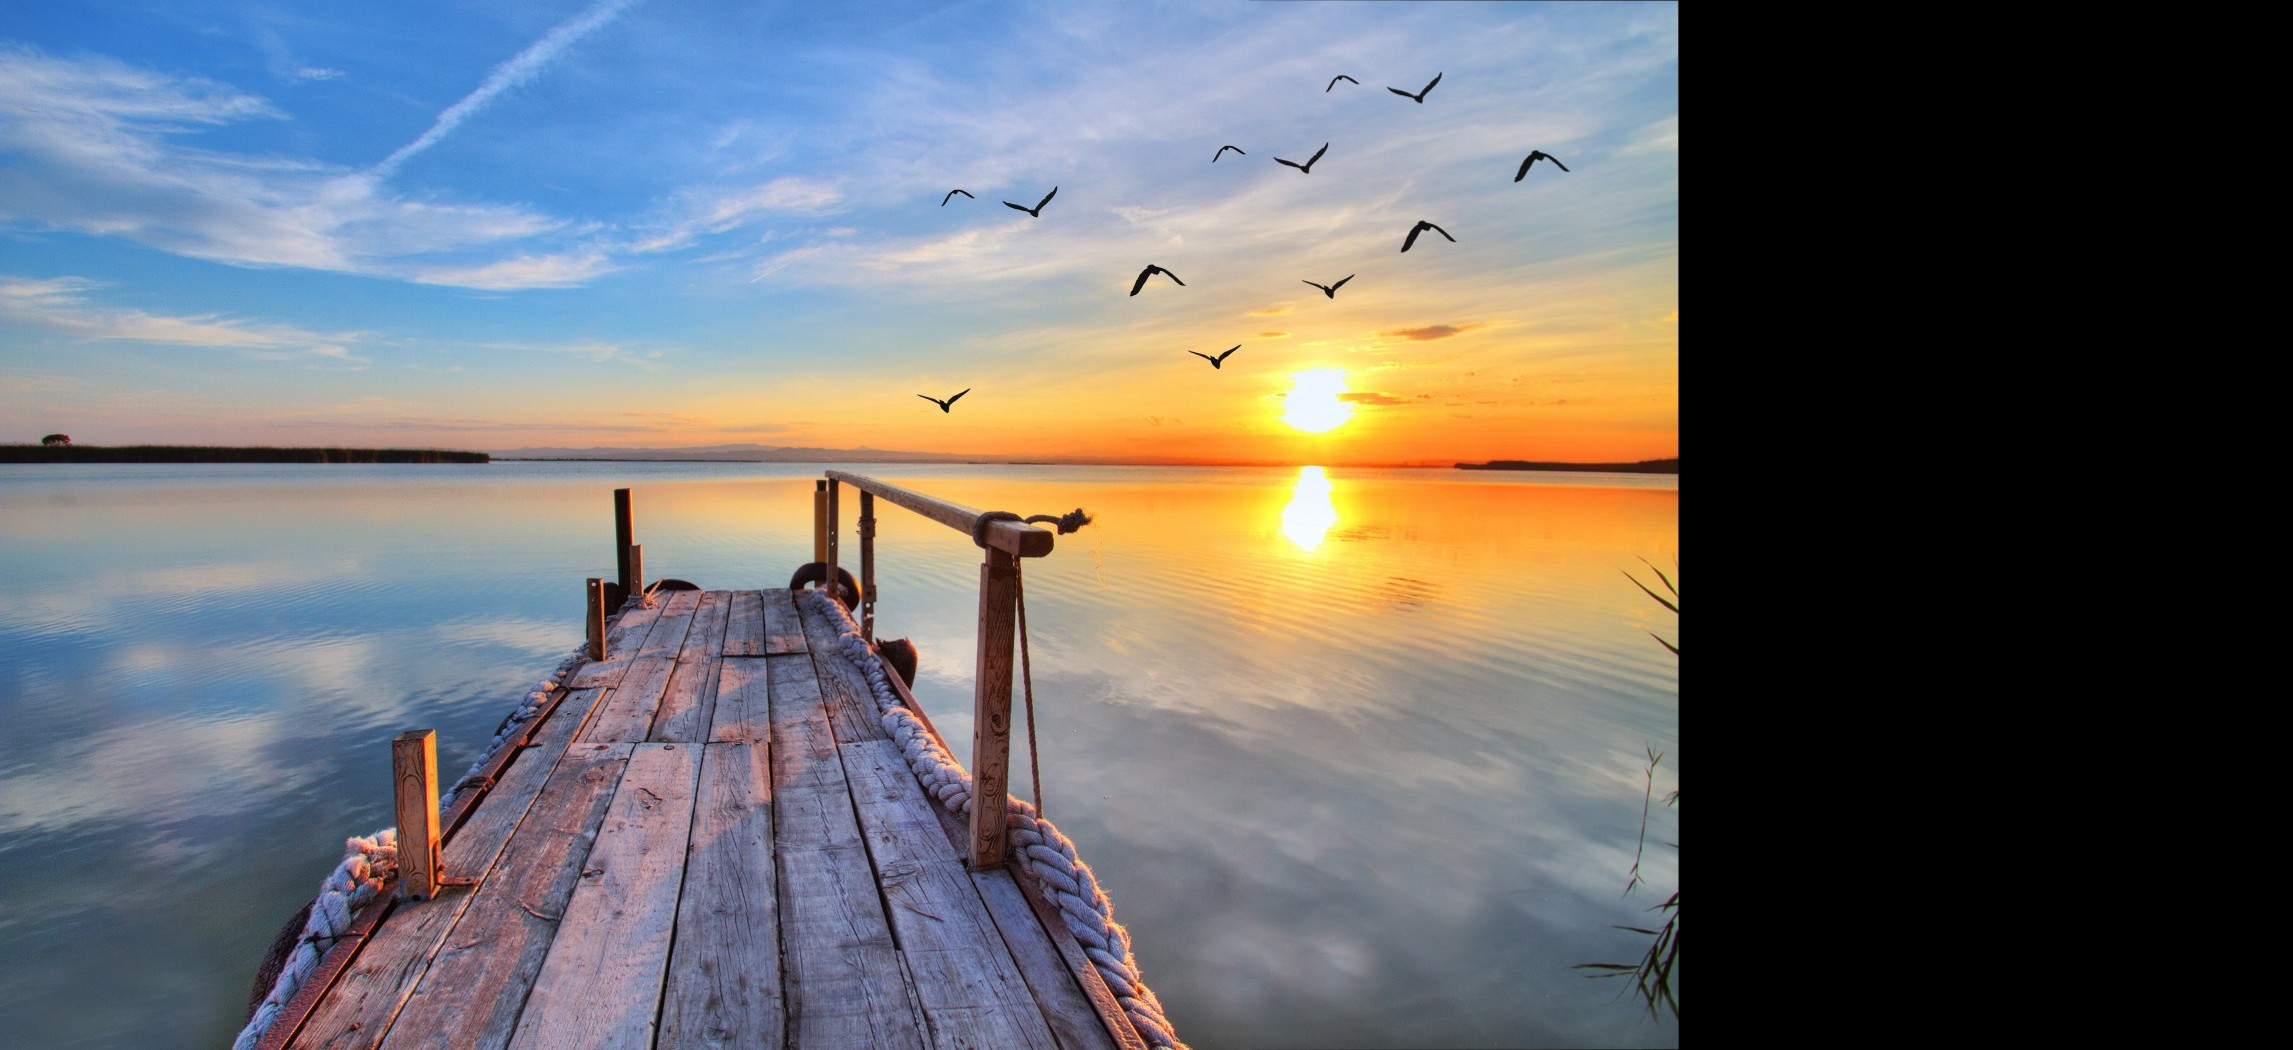

In [5]:
from __future__ import print_function
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np


#max auto-catch keypoints
MAX_FEATURES = 500
#only use the top 20% of keypoint
GOOD_MATCH_PERCENT = 0.2

def alignImages(im1, im2):
  # trun gray
  im1Gray = cv.cvtColor(im1, cv.COLOR_BGR2GRAY)
  im2Gray = cv.cvtColor(im2, cv.COLOR_BGR2GRAY)
  # find ORB keypoints and get descriptors.
  orb = cv.ORB_create(MAX_FEATURES)
  keypoints1, descriptors1 = orb.detectAndCompute(im1Gray, None)
  keypoints2, descriptors2 = orb.detectAndCompute(im2Gray, None)

  im1Keypoints = np.array([])
  #drawKeypoints(orignal image、keypoints、im1Keypoints、color、control)
  im1Keypoints = cv.drawKeypoints(image1, keypoints1, im1Keypoints, color=(0,0,255),flags=0)
  print("Saving Image with Keypoints"); 
  cv.imwrite("keypoints.jpg", im1Keypoints)

  # match
  matcher = cv.DescriptorMatcher_create(cv.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
  print(descriptors1, descriptors2)
  matches = matcher.match(descriptors1, descriptors2, None)
  
  # sort the match with distance
  matches.sort(key=lambda x: x.distance, reverse=False)

  # only have 20% of the smallest distance
  numGoodMatches = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:numGoodMatches]

  # draw the match on the picture and save
  imMatches = cv.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
  print("Saving Image with matches"); 
  cv.imwrite("matches.jpg", imMatches)
  
  # output the matches
  points1 = np.zeros((len(matches), 2), dtype=np.float32)
  points2 = np.zeros((len(matches), 2), dtype=np.float32)
  for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

  # find homography。
  h, mask = cv.findHomography(points2, points1, cv.RANSAC)

  # use homography
  im1Height, im1Width, channels = im1.shape
  im2Height, im2Width, channels = im2.shape

  im2Aligned = cv.warpPerspective(im2, h, (im2Width + im1Width, im2Height))

  # put image1
  stitchedImage = np.copy(im2Aligned)
  stitchedImage[0:im1Height,0:im1Width] = image1
  
  return im2Aligned, stitchedImage

if __name__ == '__main__':
  
  imageFile1 = "1.jpeg"
  print("Reading First image : ", imageFile1)
  image1 = cv.imread(imageFile1, cv.IMREAD_COLOR)
  cv2_imshow(image1)
  cv.waitKey(0)

  imageFile2 = "2.jpeg"
  print("Reading Second Image : ", imageFile2);  
  image2 = cv.imread(imageFile2, cv.IMREAD_COLOR)
  
  print("Aligning images ...")
  im2Aligned, stitchedImage = alignImages(image1, image2)
  print("Saving aligned image"); 
  cv.imwrite("aligned-image.jpg", im2Aligned)
  cv2_imshow(im2Aligned)

  print("Saving stitched image"); 
  cv.imwrite("stitched-image.jpg", stitchedImage)
  cv2_imshow(stitchedImage)